In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [2]:
# this will be the file that feature extractor notebook generates for each script
out_fn = '/Users/vassiki/Desktop/narrative_complexity/code/notebooks/annotations_with_char_embeddings.csv'
out_df = pd.read_csv(out_fn)

In [3]:
def get_chars_from_df(out_df):   
    """
    Function to clean up unique list of characters, will be redundant after
    the feature extraction notebook is updated
    
    Parameters
    ----------
    out_df: output csv for each script with segmented events as rows
    
    Returns
    -------
    characters: 2d list of unique characters in each event
    """
    characters = []
    for row in range(out_df.shape[0]):
    
        character_per_event = eval(out_df.loc[row, 'characters'])
        unique_chars_events = character_per_event.keys()
        chars_ev = [' '.join(c.split()) for c in list(unique_chars_events)]
        first_name = [c.split(' ')[0] for c in chars_ev]
        unique_first = list(dict.fromkeys(first_name))
        # pos tag
        #pos_tag_names = nltk.pos_tag(unique_first)
        #noun_names = [n[0] for n in pos_tag_names if 'VB' not in n[1]]

        characters.append(unique_first)
    return characters

In [4]:
def get_cooccurence_matrix_one_event(characters, event_num=0):
    """
    Function to create cooccurence matrix for all characters in an event.
    
    Parameters
    ----------
    characters: 2d list of unique characters in each event
    event_num: default 0, row number of event to return cooccurence matrix for
    
    Returns
    -------
    co_occurence_df: unique char by unique char dataframe with tallies
                        for character cooccurences
    """
    chars = list(dict.fromkeys(sum(characters,[])))
    total_array_size = len(chars)
    co_occurence_array = np.zeros((total_array_size, total_array_size))
    co_occurence_df = pd.DataFrame(co_occurence_array, columns = chars, index=chars)
    #all_pairs = list(itertools.combinations(characters[event_num], 2))
    all_pairs = list(itertools.permutations(characters[event_num], 2))
    for pair in all_pairs:
        co_occurence_df.loc[pair[0], pair[1]] += 1
    return co_occurence_df

In [5]:
def get_cooccurence_matrix_all_events(characters):
    """
    Function to create cooccurence matrix across all events
    
    Parameters
    ----------
    characters: 2d list of unique characters in each event
    
    Returns
    -------
    co_occurence_df: character by character cooccurence matrix across
                        all events
    """
    chars = list(dict.fromkeys(sum(characters,[])))
    total_array_size = len(chars)
    co_occurence_array = np.zeros((total_array_size, total_array_size))
    co_occurence_df = pd.DataFrame(co_occurence_array, columns = chars, index=chars)
    for event_chars in range(len(characters)):
        #all_pairs = list(itertools.combinations(characters[event_chars], 2))
        all_pairs = list(itertools.permutations(characters[event_chars], 2))
        for pair in all_pairs:
            co_occurence_df.loc[pair[0], pair[1]] += 1
    return co_occurence_df

In [6]:
def plot_one_event_cooccurence(fn, chars, num=0):
    """
    Function to plot each event's cooccurence matrix
    
    Parameters:
    fn: filename to save the co-occurence plot with
    chars: 2d list of unique characters in each event 
    num: default 0, event number
    """
    cdf  = get_cooccurence_matrix_one_event(chars, num)
    l = list(cdf.columns)
    plt.subplots(figsize=(20,15))
    sns.heatmap(cdf, xticklabels=l, yticklabels=l)
    plt.savefig(fn, bbox_inches = "tight")

In [7]:
def plot_all_events_cooccurence(fn, chars):
    """
    Function to plot cooccurence matrix across all events
    
    Parameters:
    fn: filename to save the co-occurence plot with
    chars: 2d list of unique characters in each event
    """    
    cca = get_cooccurence_matrix_all_events(chars)
    labels = list(cca.columns)
    plt.subplots(figsize=(20,15))
    sns.heatmap(cca, xticklabels=labels, yticklabels=labels)
    plt.savefig(fn, bbox_inches = "tight")

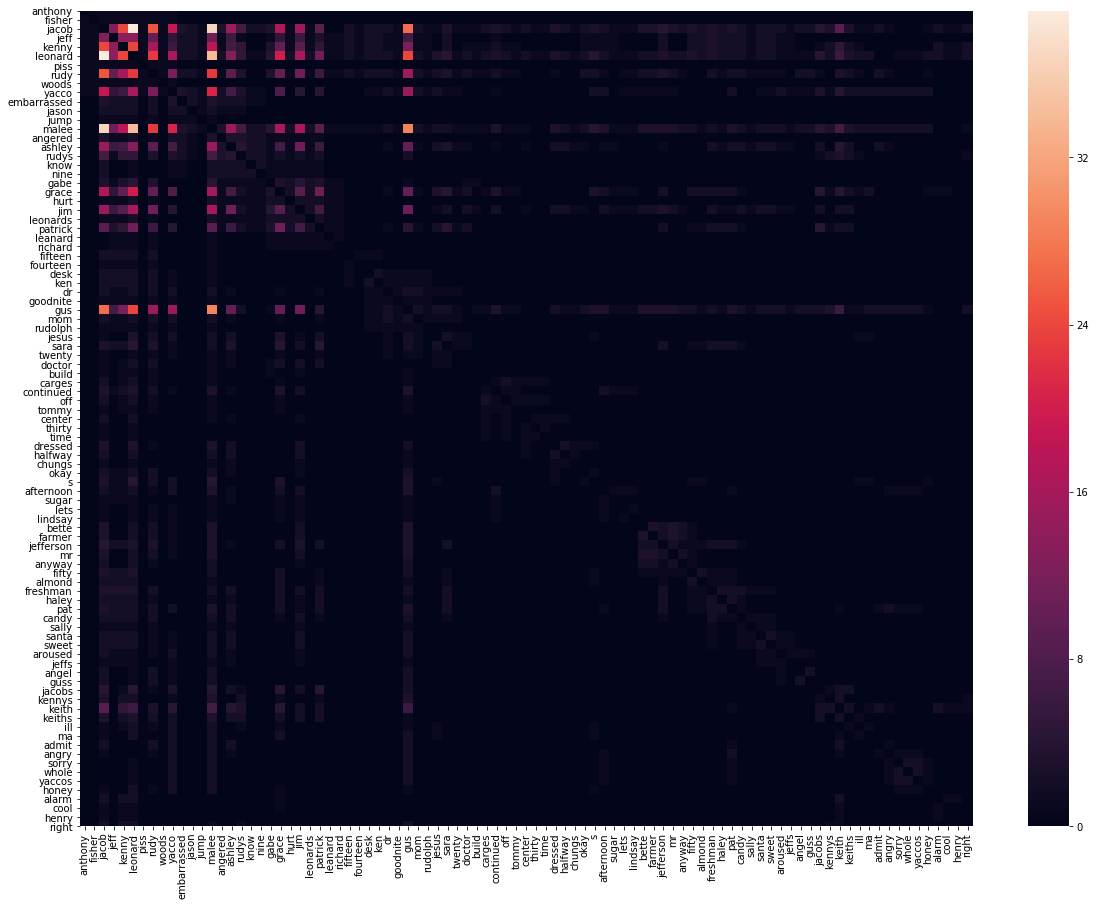

In [10]:
# generate plot for all events
characters = get_chars_from_df(out_df)
root_dir = '/Users/vassiki/Desktop/narrative_complexity/notebooks/figures/'
fn = os.path.join(root_dir, 'character_occurence.png')
plot_all_events_cooccurence(fn, characters)

/Users/vassiki/anaconda2/envs/trial_python3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


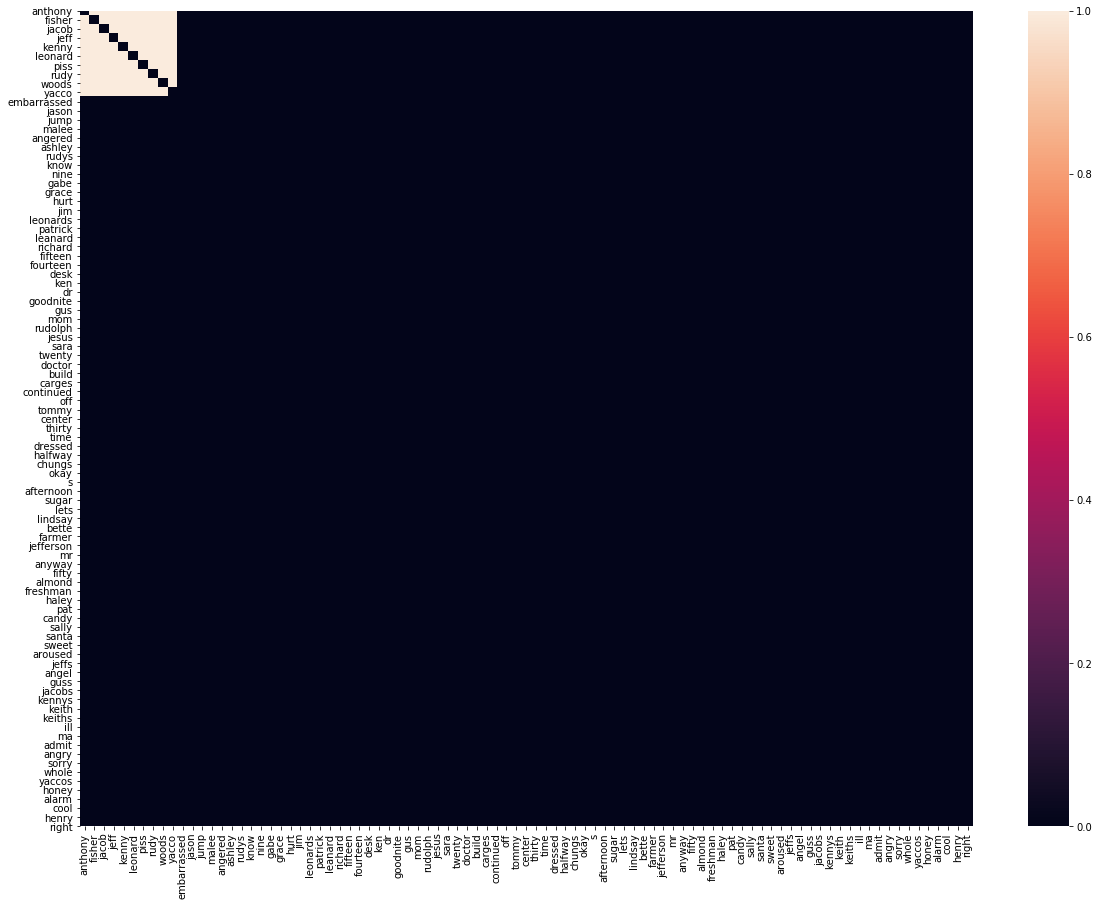

Error in callback <function flush_figures at 0x11b07c320> (for post_execute):


KeyboardInterrupt: 

In [11]:
# generate plot for one event at a time
characters = get_chars_from_df(out_df)
root_dir = '/Users/vassiki/Desktop/narrative_complexity/notebooks/figures/'
for event_num in range(len(characters)):
    fn = os.path.join(root_dir, 'character_occurence_event_{0}.png'.format(event_num))
    plot_one_event_cooccurence(fn, characters, event_num)

Run `convert -delay 10 -loop 0 *event*.png cooccurence.gif` in bash to generate gif from all events from the figures subdirectory

In [13]:
# toy example
all_elements = np.arange(10)
elements_in_events = []
num_events = 20
for ev in range(num_events):
    elems_this_event = np.random.choice(5, np.random.randint(1,5, size=1), replace=False)
    elements_in_events.append(list(elems_this_event))

In [14]:
all_cdf = get_cooccurence_matrix_all_events(elements_in_events)

In [16]:
mat = all_cdf.values

In [20]:
def test_check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

In [21]:
check_symmetric(mat)

True

Inspired my Mark's talk, implementing Correspondence Analysis

https://github.com/elena-sharova/correspondence_analysis

In [8]:
characters = get_chars_from_df(out_df)
count_df = get_cooccurence_matrix_all_events(characters)

In [9]:
m = count_df.gt(10)
at= count_df.loc[m.any(axis=1), m.any()]

In [10]:
sampleCrosstab = at.values

Computing chi-squared

In [48]:
grandTotal = np.sum(sampleCrosstab)
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
independenceModel = np.outer(rowTotals, columnTotals)

In [49]:
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)

257.8060638042886


In [50]:
# Quick check - compare to scipy Chi-Squared test
from scipy.stats import chi2_contingency
statistic, prob, dof, ex = chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

257.80606380428856
0.0


In [11]:
def correspondence_analysis(sampleCrosstab):
    grandTotal = np.sum(sampleCrosstab)
    correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
    rowTotals = np.sum(correspondenceMatrix, axis=1)
    columnTotals = np.sum(correspondenceMatrix, axis=0)
    independenceModel = np.outer(rowTotals, columnTotals)
    chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
    print('Chi Squared for this matrix is {0}'.format(chiSquaredStatistic))
    # pre-calculate normalised rows
    norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])

    chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))

    norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
    for row in range(correspondenceMatrix.shape[0]):
        chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))


    standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))

    u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

    deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))

    rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
    return rowScores

In [12]:
rowScores = correspondence_analysis(sampleCrosstab)

Chi Squared for this matrix is 257.8060638042886


In [13]:
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'], index=at.columns)

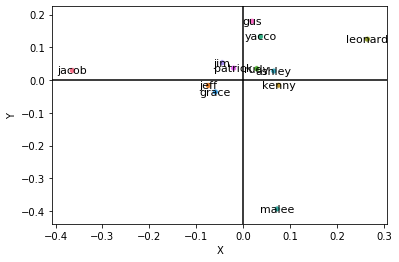

In [101]:
ax = sns.scatterplot(data=dfFirstTwoComponents,x='X', y='Y', hue=at.columns)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)

for label in at.columns:
    plt.annotate(label, 
                 (dfFirstTwoComponents.loc[label,:]['X'],
                  dfFirstTwoComponents.loc[label,:]['Y']),
                 horizontalalignment='center', verticalalignment='center',size=11)

In [14]:
dfFirstTwoComponents['group'] = list(dfFirstTwoComponents.index)
dfFirstTwoComponents['colors'] = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#000000']

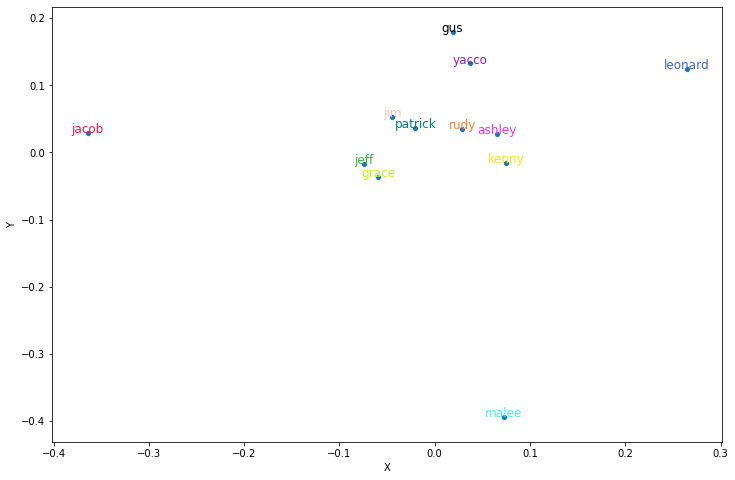

In [17]:
import matplotlib.pylab as plt
fig = plt.figure(figsize = (12,8))
#plt.figure(figsize = (12,8))
ax = sns.scatterplot(dfFirstTwoComponents['X'], dfFirstTwoComponents['Y'])

for line in range(0,dfFirstTwoComponents.shape[0]):
     ax.text(dfFirstTwoComponents.X[line], dfFirstTwoComponents.Y[line], dfFirstTwoComponents.group[line], horizontalalignment='center', size='large', color= dfFirstTwoComponents.colors[line])
        
fig.savefig('character2d.png', bbox_inches="tight")
        

In [16]:
plt.savefig('characters_2d.png')

<Figure size 432x288 with 0 Axes>